## Network Science Project 2
### Autumn 2022
### Due: December 15th, 1:00pm GMT

Please provide the following information:

CID: 02033207

In [1]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#You may also use scipy as needed

### Overview

In this assignment, you will be investigating a model for the spread of an infectious disease between communities via an air transportation network. You have been provided a file containing the network data which should be stored in the same folder as this notebook. Run the cell below to verify that you can load the graph.

In [2]:
import networkx as nx
g = nx.read_graphml('P2.graphml')
g = nx.convert_node_labels_to_integers(g)
print(g)

Graph with 2905 nodes and 15645 edges


The output from the cell above should be: "Graph with 2905 nodes and 15645 edges"

### 1. (6 points)

(a) Create a well-designed plot which displays (i) the degree distribution of the provided graph, (ii) the stationary expected degree distribution for the simple Barabasi-Albert model analyzed in lecture, and (iii) the degree distribution for the $G_{Np}$ model with $N$ chosen to match the number of nodes in the provided graph and $p$ chosen so that the expected degree matches the average degree of the provided graph. Note: it may be helpful to use *scipy.stats.binom*


C:\Users\maxfr\AppData\Local\Temp\ipykernel_4668\619691946.py:42: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g)


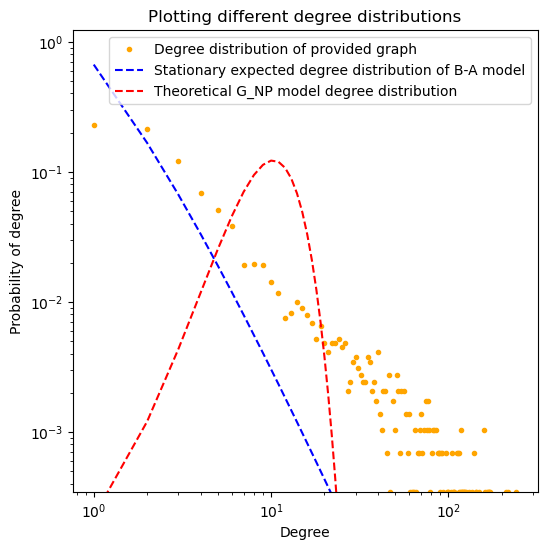

In [3]:
#Add code for 1.(a) here
import scipy as sp
from scipy.stats import binom

N = nx.number_of_nodes(g)

deg = [g.degree(n) for n in g]

degree_k,count_k = np.unique(deg, return_counts=True) 
prob_of_degree_k = count_k/g.number_of_nodes()


fig, ax1 = plt.subplots(1,figsize=(6,6))


ax1.loglog(degree_k,prob_of_degree_k,ls='', marker='.', label='Degree distribution of provided graph',color="Orange")


maxDeg = max(degree_k)
degRange  = range(1,maxDeg)


y2  = [4/((k+2)*(k+1)*k) for k in degRange]


ax1.plot(degRange,y2,ls='--',color="Blue",label='Stationary expected degree distribution of B-A model')


p=np.mean(deg)/(N-1)

y3  = binom.pmf(degRange,N-1,p)

ax1.plot(degRange,y3,ls='--',color="Red",label='Theoretical G_NP model degree distribution')

ax1.set_ylim(min(prob_of_degree_k), max(prob_of_degree_k)+1)

ax1.legend()
ax1.set_xlabel("Degree")
ax1.set_ylabel("Probability of degree")
ax1.set_title("Plotting different degree distributions")

A = nx.adjacency_matrix(g)


(b) Based on your plot and your understanding of the relevant models, carefully discuss the suitability of the $G_{Np}$ model and the linear preferential attachment assumption for generating graphs like the provided air transportation network.



**Put some text here explaining**


### 2. (7 points) 
In this question, you will develop code to simulate the spread of an infectious disease through $N$ communities connected by the provided air transportation network. Each node corresponds to a community characterized by: $x_i(t)$, the ratio of the the number in community $i$ who are infected and the original population of the community; similarly, $s_i(t)$ is the fraction of people who are susceptible with respect to the original population in community $i$. People may also be recovered with immunity so initially, $x_i+s_i+r_i=1$.
The governing equations are,

\begin{gather*}
  \frac{ds_i}{dt} = -\beta s_i x_i + \alpha \sum_{j=0}^{N-1}\frac{A_{ij}}{k_i}(s_j-s_i) \\
  \frac{dx_i}{dt} = \beta s_i x_i -\mu x_i + \alpha \sum_{j=0}^{N-1}\frac{A_{ij}}{k_i}(x_j-x_i) \\
  i=0,1,2,...,N-1\\
\end{gather*}
Here, $A_{ij}$ is the adjacency matrix for the provided network, $k_i$ is the degree of node $i$, and $\alpha$, $\beta$, and $\mu$ are model parameters which must be specified.
The initial condition should correspond to only one specified node containing infectious people, $x_{i0}(t=0)=x0$, $s_{i0}=1-x0$, and all other nodes should have $s_j(t=0)=1$. Note that the graph nodes are numbered from $0$ to $N-1$ which is why the sums in the equations are over the same range.

You will now develop the function, *Cmodel*, so that it computes
    a numerical solution for this model on the network provided as input in the form of a NetworkX graph. The timespan of the simulation
    and other model parameters are also provided as input -- see the documentation for the function below.

(a) Complete the function, *RHS*, so that it efficiently computes and returns the
right-hand side of the model equations (see the function docstring below). You should assume that RHS will be called a very large
number of times within one call to *Cmodel* and construct your code accordingly.
You should also design your code for large complex simple graphs such as those found in table 2.1 in Barabasi, though it is recommended that you develop and test your code with much smaller graphs. Note that variables set "above" RHS will be available within RHS.
Add a brief discussion below explaining how you have designed your function and why it can be considered to be efficient.

(b) Add the needed code to *Cmodel* below to efficiently and accurately simulate the model for $Nt$ time steps from $t=0$ to $t=tf$
with the initial condition set as described above. The function should return an array containing $s_i$ and $x_i$ for each node at each time step (including the initial condition). Part (c) provides guidance on how accurate your code should be.

In [4]:


def Cmodel(g,i0=2,x0=0.0001,alpha=1e-2,beta=2,mu=1.0,tf=20,Nt=1000):
    """
    Simulate community network infectious disease model

    Input:
    g: N-node undirected Networkx graph with nodes numbered from 0 to N-1
    i0: node which is initially infected with x_i0=x0
    x0: magnitude of x(t=0) for node i0
    alpha,beta,mu: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: size Nt+1 array
    sarray: N x Nt+1 array containing s across the N network nodes at
            each time step
    xarray: N x Nt+1 array containing x across the N network nodes at
            each time step.

    """
    import numpy as np
    import networkx as nx

    N = g.number_of_nodes()
    tarray = np.linspace(0,tf,Nt+1)
    sarray = np.zeros((N,Nt+1))
    xarray = np.zeros((N,Nt+1))
    
    ########START OF CODE#########

    #Add code for 2. (a) and (b) as needed


    s1 = np.append(np.ones(N),np.zeros(N))
    x1 = np.append(np.zeros(N),np.ones(N))
    
    A = nx.adjacency_matrix(g)
    A = A.toarray()
    
    #########END OF CODE########

    def RHS(t,y):
        """Compute RHS of model1 at time t
        input: y should be a size 2N array with y[:N] and y[N:2*N]
        corresponding to s on nodes 0 to N-1 and x on nodes 0 to
        N-1, respectively.
        output: dy, also a size 2N array corresponding to dy/dt
        """
        dy = np.zeros(2*N) #remove/modify as needed
        
        #Add code for 2.(a) here 
        ##########START OF CODE############        

        #Add code for 2.(a) here 
        s,x = np.array_split(y,2)
        s2 = np.append(s,np.zeros((N,1)))
        x2 = np.append(np.zeros((N,1)),x)

        sterm1 = -beta*s*x
        sterm2 = alpha*np.dot(A,s)/np.sum(A,axis=0)
        sterm3 = -alpha*s

        xterm1 = beta*s*x
        xterm2 = alpha*np.dot(A,x)/np.sum(A,axis=0)
        xterm3 = -mu*x
        xterm4 = -alpha*x

        ds = sterm1+sterm2+sterm3
        dx = xterm1+xterm2+xterm3+xterm4

        dy = np.append(ds,dx)
    
        ##########END OF CODE#########

        return dy

    ##########START OF CODE############

    from scipy.integrate import solve_ivp

    identity = np.zeros(N)
    identity[i0] = x0
    initials = np.ones(N)-identity
    initialx = np.zeros(N)+identity
    y0 = np.append(initials,initialx)

    sol = solve_ivp(RHS, [tarray[0],tarray[-1]], y0, t_eval = tarray)
    sarray, xarray = np.split(sol.y,2)
    
    #Add code for 2. (a) and (b) as needed

    ###########END OF CODE##########

    return tarray,sarray,xarray

*Add explanation for 2.(b) here*


(c) Design a test for your code for the case alpha=0, beta=0, mu=1, x0=1. As part of your test, for $t$ such that $0 \leq t \leq 10$, create a figure that clearly illustrates how accurate (or inaccurate) your code is for these parameter values. Your code in *Cmodel* should be designed so that the magnitude of the difference between the exact solution and the computed solution for $x_{i0}$ at $t=1$ is less than $10^{-5}$. Provide a brief discussion of your figure below.  

C:\Users\maxfr\AppData\Local\Temp\ipykernel_4668\1945639119.py:36: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g)


<class 'numpy.ndarray'>
2905
2001
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.95012476e-01 9.90049821e-01 ... 1.29443804e-04
  1.28817077e-04 1.28180934e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


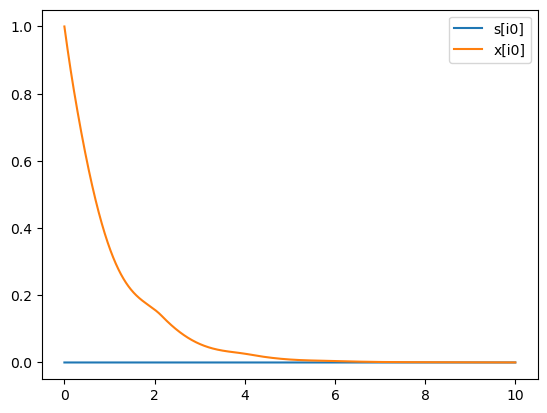

In [5]:
# Add code for 2.(c) here

#t,s,x = Cmodel(g,i0=2,x0=0.0001,alpha=0.01,beta=2,mu=0,tf=10)
#t, s, x = Cmodel(g, i0=2,x0=0.0001,alpha=1e-2,beta=2,mu=1.0,tf=2000,Nt=1000)
t, s, x = Cmodel(g, x0=1, alpha=0, beta=0, mu=1.0, tf=10,Nt=2000)
fig, ax = plt.subplots()
print(type(s))
print(len(x))
print(len(x[0]))
print(x)
i0 = 2
ax.plot(t,s[i0],label="s[i0]")
ax.plot(t,x[i0],label="x[i0]")
ax.legend()


*Add discussion for 2.(c) here*

### 3. (7 points)

For this question, set $i0=2$, $x0=10^{-4}$, $\alpha=10^{-2}$, $\beta=2$, and $\mu=0$. Carefully investigate and analyze the spread of disease on the provided network for $0\leq t\leq 4$. Your analysis should (1) carefully present simulation results to support your observations and conclusions, and (2) where appropriate, make clear connections to the model equations and their properties. You may include up to four well-designed figures to support your discussion and conclusions. You may vary the model parameters if it helps you answer the question, however the focus of your analysis should be on results generated with the specified parameters.

In [6]:
# Add code for 3. here
t, s, x = Cmodel(g,i0=2,x0=0.0001,alpha=0.01,beta=2,mu=0,tf=4)


C:\Users\maxfr\AppData\Local\Temp\ipykernel_4668\1945639119.py:36: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g)


*Add discussion for 3. here*


### Further guidance

* You should submit both your completed Jupyter notebook and *either* a pdf version or html version of your notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead.
    To submit your assignment, go to the module Blackboard page and click on Project 2. There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project2.ipynb* and *project2.pdf* or *project2.html*). 
* You may use numpy, scipy, networkx, and matplotlib as needed. Please do not any use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your code for question 2(a) and (b), and the degree to which your submission reflects a good understanding of the material we have covered. While creative ideas based on class material are welcome, you are not expected to base your work on new ideas/concepts/methods that have not been covered (and it is unlikely that credit will be given for such work).
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous") or asking for a one-on-one meeting during office hours.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
